# Pool1 - PfDHFR (pool 1 - 7 run for individ samples)

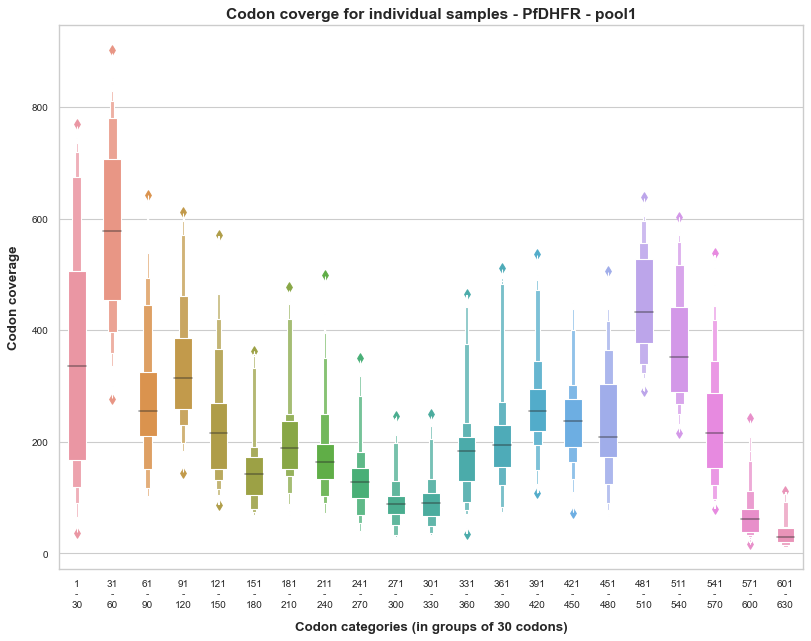

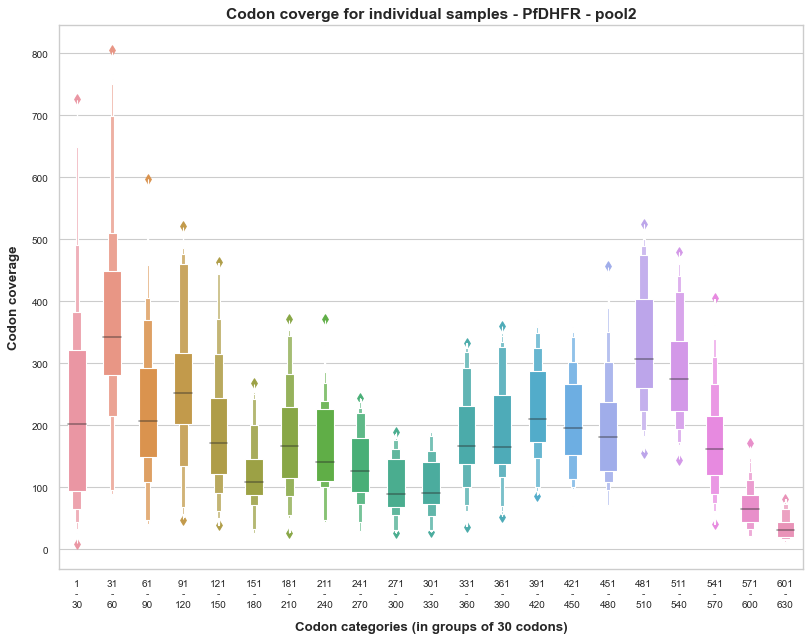

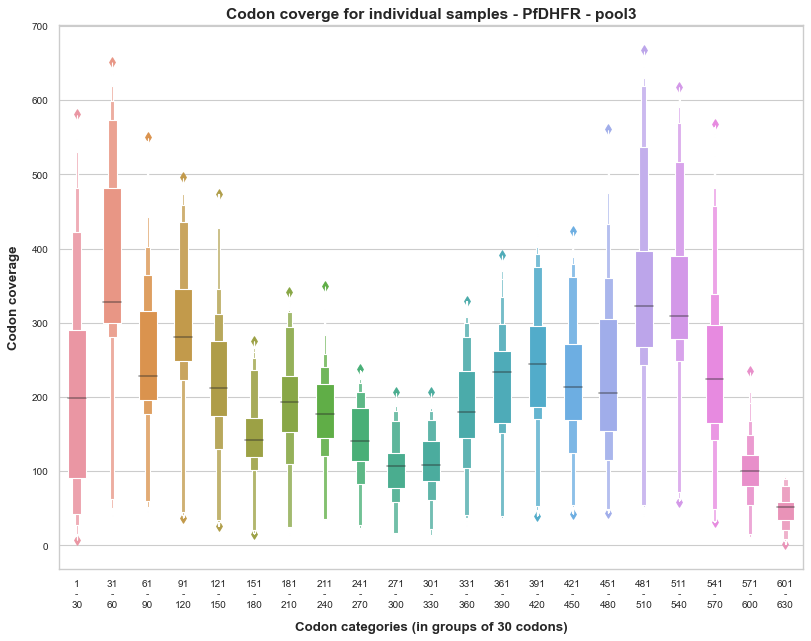

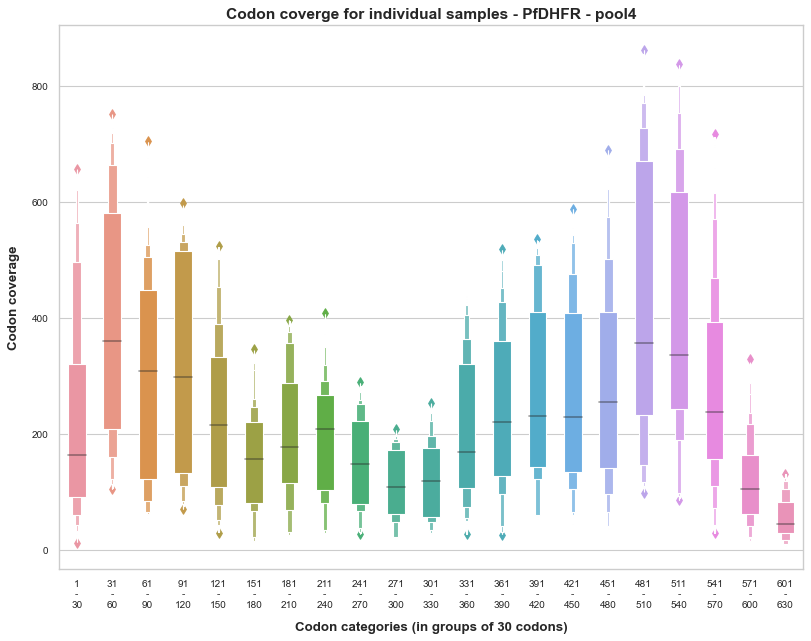

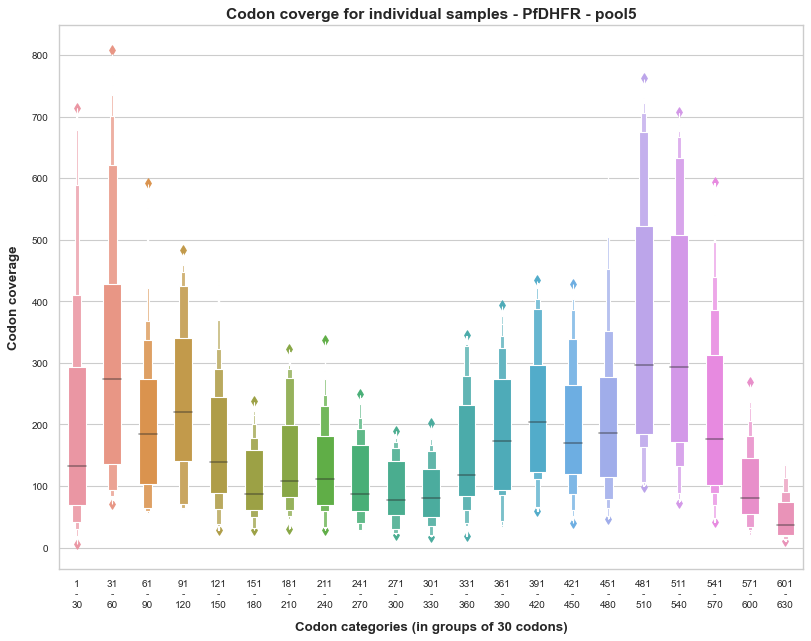

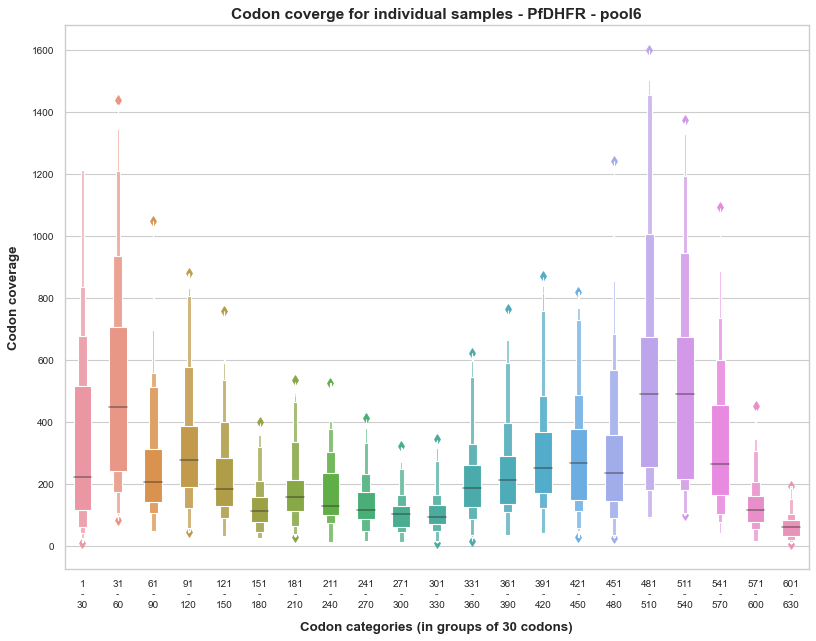

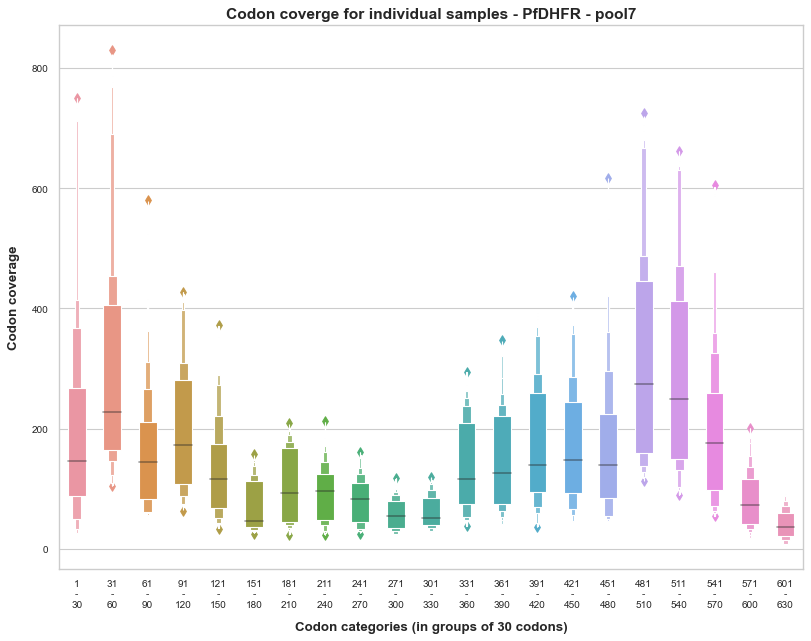

In [23]:
import os
import pandas as pd

"""
Combining the boxenplots for PfDHFR while keeping the 30 codon category.

Goal: Add each respective category positions for each gene to make a single category position.

dict{sample1: [[1-30], [31-60], [61,90]], sample2: [[1-30], [31-60], [61,90]], sample3: [[1-30], [31-60], [61,90]]}
==> this is cc_dict2

Adding sample1[1-30] + sample2[1-30]+ sample3[1-30] to get final[1-30]
==> fin is a list of lists --> fin = [[1-30 of all samples], [31-60 of all samples], [61-90 of all samples]]

Using fin for plotting the boxenplot.

Converting fin into a tuple for values to plot
"""

for i in range(1, 8):
    pool_id = "pool"+str(i)

    cc_dict2 = {}
    directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/'+pool_id
    for filename in os.listdir(directory):
    #     temp_list = []
        if filename != ".DS_Store":
            filepath = os.path.join(directory, filename)
            sample_num = filename[4:10]
            df = pd.read_csv(filepath, sep="\t") # reading each coverage file in pool 1 as a dataframe
            df_list = list(df.Codon_coverage) #converting coverage column into a list
            cc_dict2[sample_num] = []
            for i in range(0, len(df_list), 30):
                temp_list = df_list[i:i+30]
                cc_dict2[sample_num].append(temp_list)

    fin = []

    # for key in cc_dict2:
    #     print(len(cc_dict2[key]), key)

    first_key_cc_dict2 = list(cc_dict2.keys())[0]
    # print(first_key_cc_dict2)

    for j in range(len(cc_dict2[first_key_cc_dict2])):
        temp = []
        for key in cc_dict2:
            for i in range(len(cc_dict2[key][j])):
                temp.append(cc_dict2[key][j][i])
        fin.append(temp)
    # print(fin)

    fin_tuple = tuple(fin)

    import seaborn as sns, matplotlib.pyplot as plt

    data_list = []
    final = []
    dict_data = {}
    keys_list=[]

    # label_file = 

    with open(r"/Users/mansi/Desktop/haiti-ind/PfDHFR/Category_results/avg_cat_cov/avg_9540Pf_PfDHFR_cat_cov.txt") as f1:
        for line in f1:
            new=line.split(",")
    #         print(new)
        for i in range(len(new)):
            if len(new[i]) != 0:
                final.append(int(new[i]))

    for i in range(0, len(final), 30):
            key = str(i+1)+ "\n-\n" +str(i + 30)
            keys_list.append(key)
    labels_tup = tuple(keys_list)

    dpi = 80   
    fig = plt.figure(1, figsize=(12, 9), dpi = dpi)
    ax = fig.add_subplot(111)    
    sns.set(rc={'figure.figsize':(12,10)}, style="whitegrid")
    bp = sns.boxenplot(data = fin_tuple, width = 0.5)

    title = 'Codon coverge for individual samples - PfDHFR - '+pool_id

    ax.set_title(title, fontweight ='bold', fontsize = 14)
    ax.set_ylabel('Codon coverage', fontweight ='bold', labelpad = 10.5)
    ax.set_xlabel('Codon categories (in groups of 30 codons)', fontweight ='bold', labelpad = 10.5)

    plt.xticks(plt.xticks()[0], labels = labels_tup)
    plt.tick_params('both', labelsize='9')


    plt.show()

    outputfile = '/Users/mansi/Desktop/haiti-ind/PfDHFR/Pool_Images/'+"PfDHFR-ind-"+pool_id+".png"
    fig.savefig(outputfile, bbox_inches='tight')

# Pool 8, 9, 10 have problems with consistency in their no. of codon categories




### Here is the difference between pool 1 and pool 8

In [30]:
cc_dict2 = {}
directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool1'
for filename in os.listdir(directory):
#     temp_list = []
    if filename != ".DS_Store":
        filepath = os.path.join(directory, filename)
        sample_num = filename[4:10]
        df = pd.read_csv(filepath, sep="\t") # reading each coverage file in pool 1 as a dataframe
        df_list = list(df.Codon_coverage) #converting coverage column into a list
        cc_dict2[sample_num] = []
        for i in range(0, len(df_list), 30):
            temp_list = df_list[i:i+30]
            cc_dict2[sample_num].append(temp_list)

fin = []

print("Pool1 samples with their no. of codon categories\n")

for key in cc_dict2:
    print(len(cc_dict2[key]), key)

first_key_cc_dict2 = list(cc_dict2.keys())[0]
# print(first_key_cc_dict2)


Pool1 samples with their no. of codon categories

21 9955Pf
21 9696Pf
21 9953Pf
21 9540Pf
21 10026P
21 9832Pf
21 9867Pf
21 10076P
21 9593Pf
21 9647Pf


In [29]:
cc_dict2 = {}
directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool8'
for filename in os.listdir(directory):
#     temp_list = []
    if filename != ".DS_Store":
        filepath = os.path.join(directory, filename)
        sample_num = filename[4:10]
        df = pd.read_csv(filepath, sep="\t") # reading each coverage file in pool 1 as a dataframe
        df_list = list(df.Codon_coverage) #converting coverage column into a list
        cc_dict2[sample_num] = []
        for i in range(0, len(df_list), 30):
            temp_list = df_list[i:i+30]
            cc_dict2[sample_num].append(temp_list)

fin = []

print("Pool8 samples with their no. of codon categories\n")

for key in cc_dict2:
    print(len(cc_dict2[key]), key)

first_key_cc_dict2 = list(cc_dict2.keys())[0]
# print(first_key_cc_dict2)


Pool8 samples with their no. of codon categories

21 9884Pf
21 9944Pf
14 9672Pf
21 9897Pf
1 9683Pf
20 9621Pf
21 9855Pf
21 9788Pf
20 9596Pf


## For PfDHFR there are total 21 categories with a length of 30 codons in each category.


#### However for sample 8, 9 and 10 the number varies for some samples. 

##### Example: Pool 8

14 9672Pf --> erroneous sample

1 9683Pf --> erroneous sample

## Trying pool 8 plotting

#### Edit: Successful

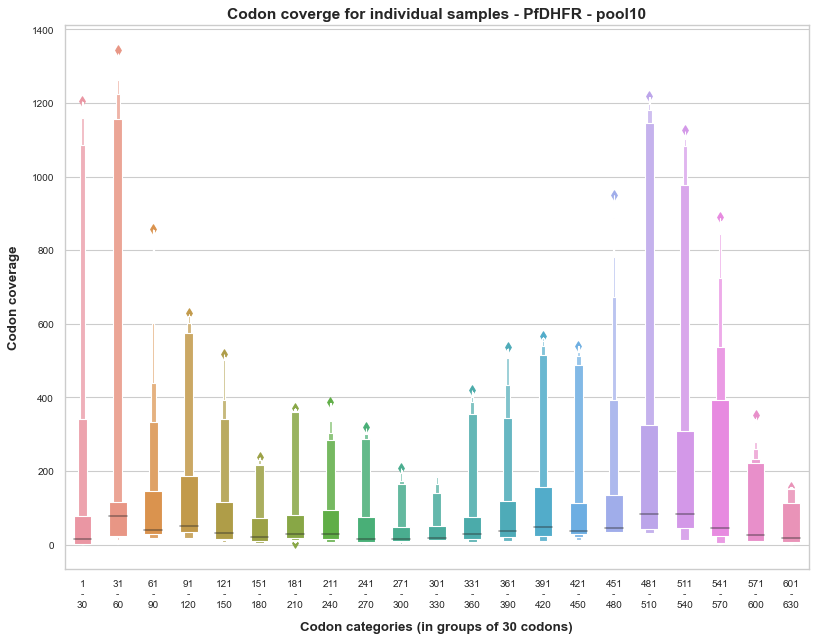

In [58]:
pool_id = "pool10"

cc_dict2 = {}
directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool10'
for filename in os.listdir(directory):
#     temp_list = []
    if filename != ".DS_Store":
        filepath = os.path.join(directory, filename)
        sample_num = filename[4:10]
        df = pd.read_csv(filepath, sep="\t") # reading each coverage file in pool 1 as a dataframe
        df_list = list(df.Codon_coverage) #converting coverage column into a list
        cc_dict2[sample_num] = []
        for i in range(0, len(df_list), 30):
            temp_list = df_list[i:i+30]
            cc_dict2[sample_num].append(temp_list)

fin = []

# for key in cc_dict2:
#     print(len(cc_dict2[key]), key)

first_key_cc_dict2 = list(cc_dict2.keys())[0]
# print(first_key_cc_dict2)

for j in range(len(cc_dict2[first_key_cc_dict2])):
    temp = []
    for key in cc_dict2:
        if j < len(cc_dict2[key]):
            for i in range(len(cc_dict2[key][j])):
#                 print("i:", i, "key:",key,"j:", j, "len(key):",len(cc_dict2[key]))
                temp.append(cc_dict2[key][j][i])
    fin.append(temp)
    
# print(len(fin))

fin_tuple = tuple(fin)

import seaborn as sns, matplotlib.pyplot as plt

data_list = []
final = []
dict_data = {}
keys_list=[]

# label_file = 

with open(r"/Users/mansi/Desktop/haiti-ind/PfDHFR/Category_results/avg_cat_cov/avg_9540Pf_PfDHFR_cat_cov.txt") as f1:
    for line in f1:
        new=line.split(",")
#         print(new)
    for i in range(len(new)):
        if len(new[i]) != 0:
            final.append(int(new[i]))

for i in range(0, len(final), 30):
        key = str(i+1)+ "\n-\n" +str(i + 30)
        keys_list.append(key)
labels_tup = tuple(keys_list)

dpi = 80   
fig = plt.figure(1, figsize=(12, 9), dpi = dpi)
ax = fig.add_subplot(111)    
sns.set(rc={'figure.figsize':(12,10)}, style="whitegrid")
bp = sns.boxenplot(data = fin_tuple, width = 0.5)

title = 'Codon coverge for individual samples - PfDHFR - '+pool_id

ax.set_title(title, fontweight ='bold', fontsize = 14)
ax.set_ylabel('Codon coverage', fontweight ='bold', labelpad = 10.5)
ax.set_xlabel('Codon categories (in groups of 30 codons)', fontweight ='bold', labelpad = 10.5)

plt.xticks(plt.xticks()[0], labels = labels_tup)
plt.tick_params('both', labelsize='9')


plt.show()

outputfile = '/Users/mansi/Desktop/haiti-ind/PfDHFR/Pool_Images/'+"PfDHFR-ind-"+pool_id+".png"
fig.savefig(outputfile, bbox_inches='tight')

## Trying a complete run for all 10 pools


#### Edit: Successful

This is the final script for PfDHFR individual pool graphs

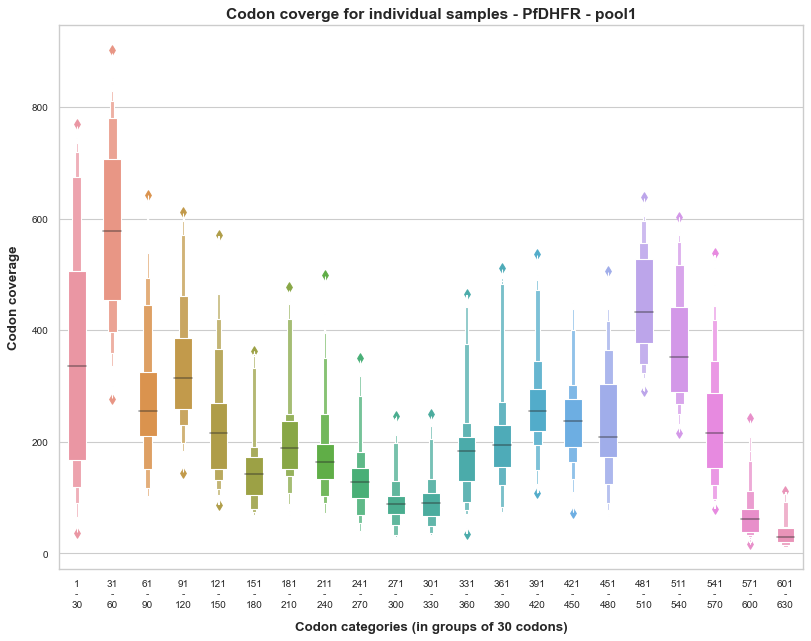

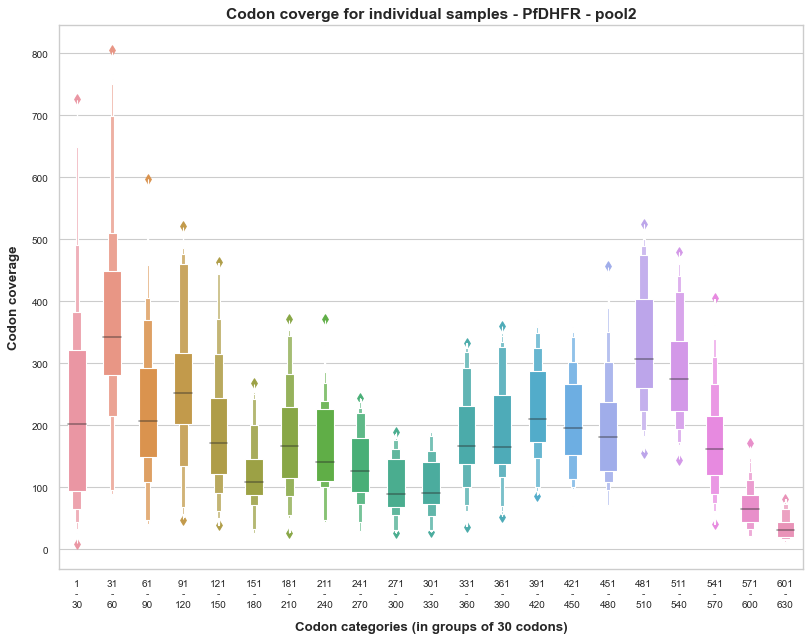

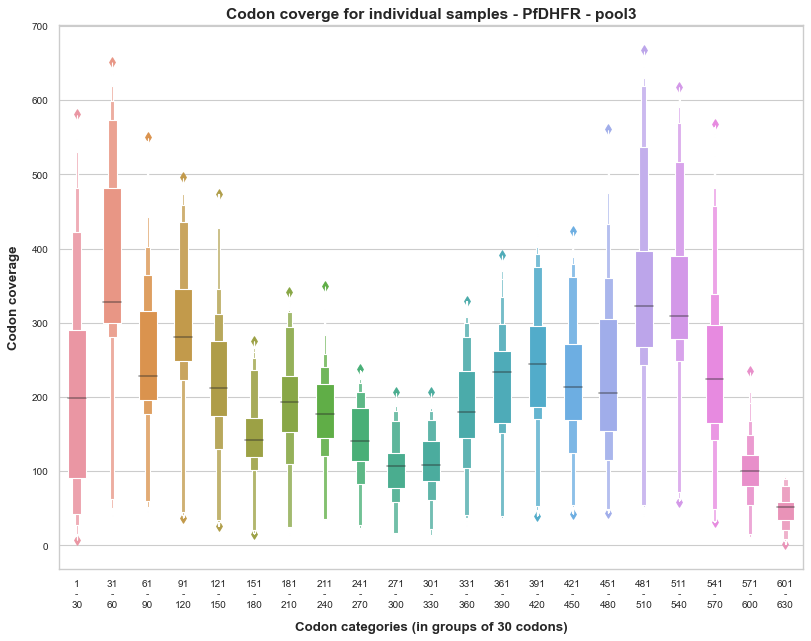

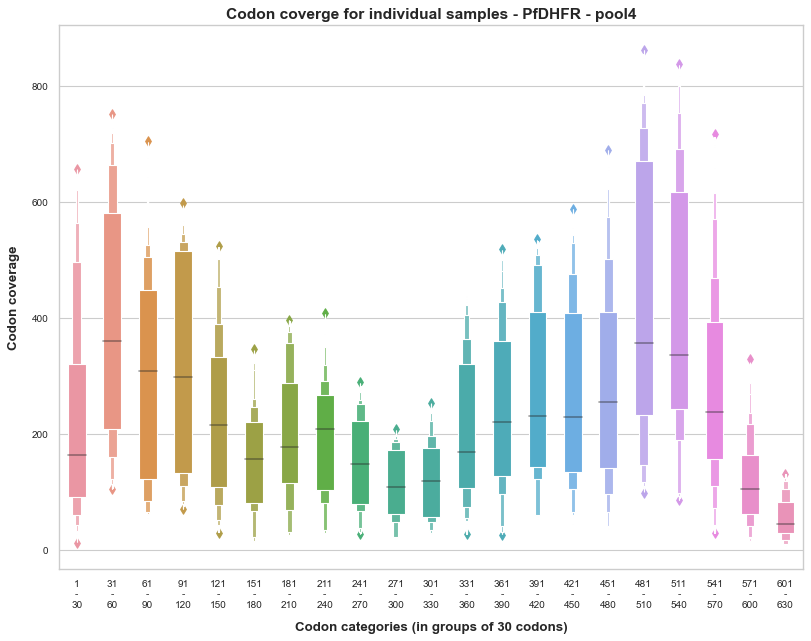

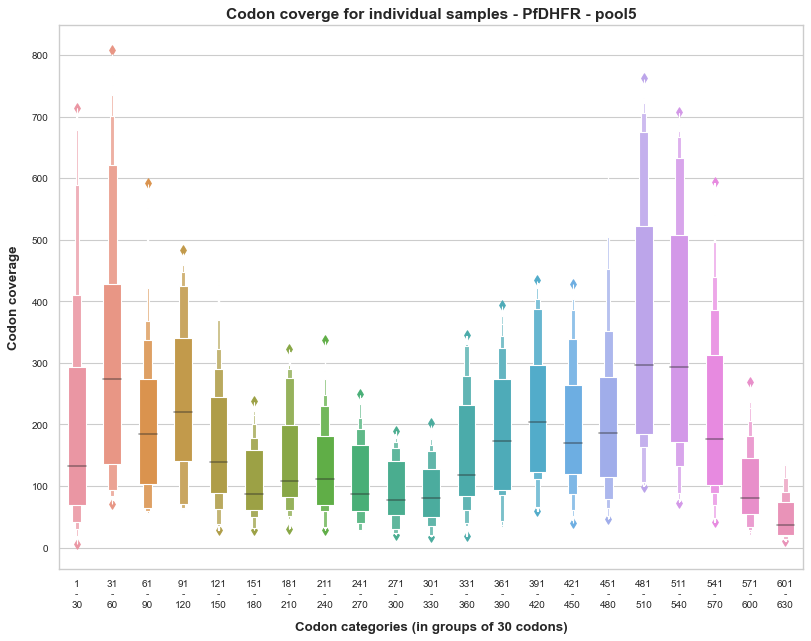

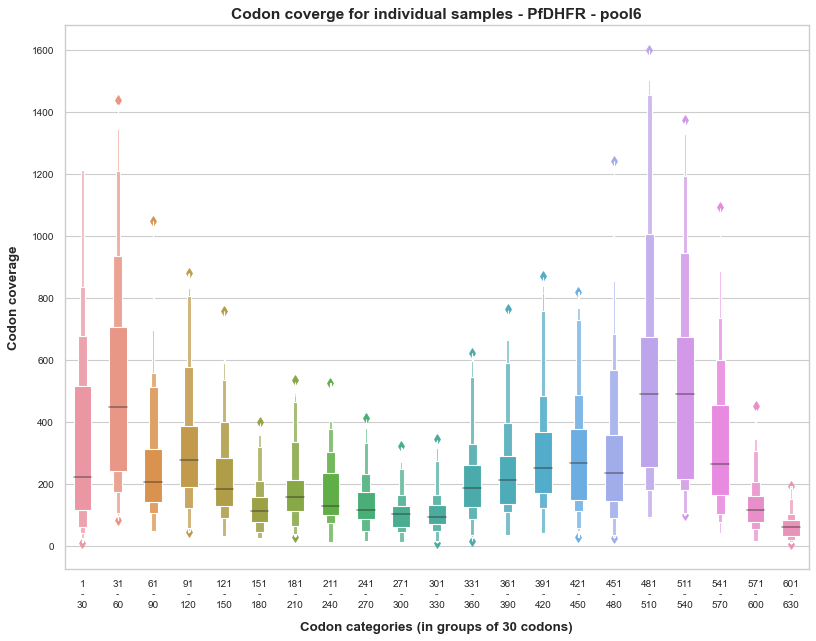

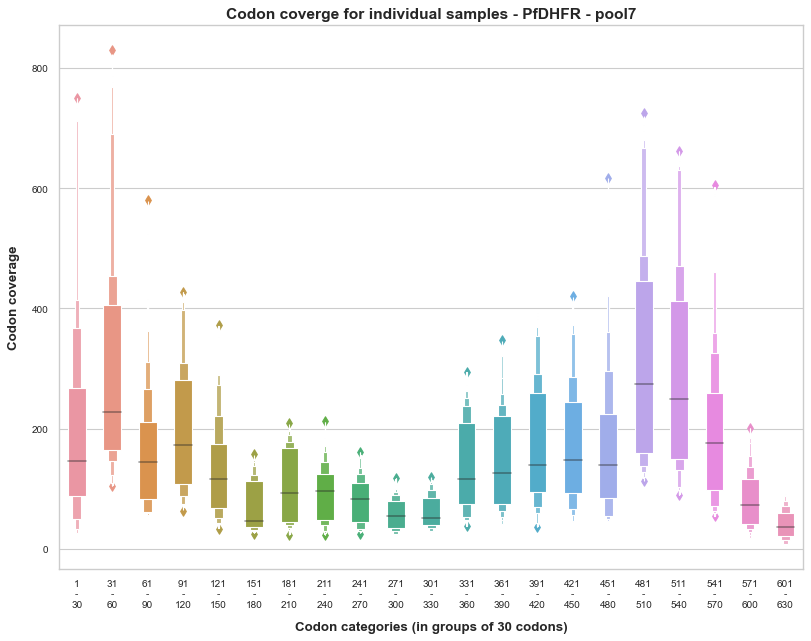

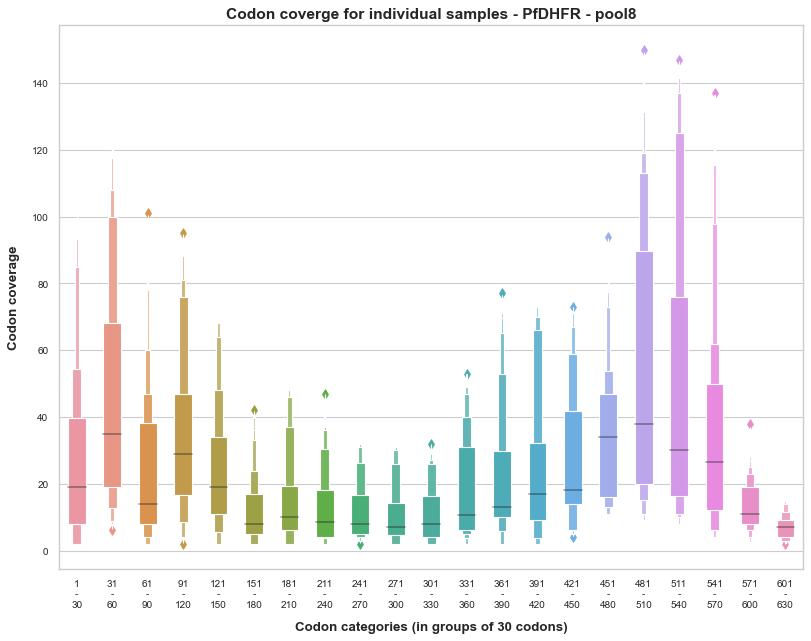

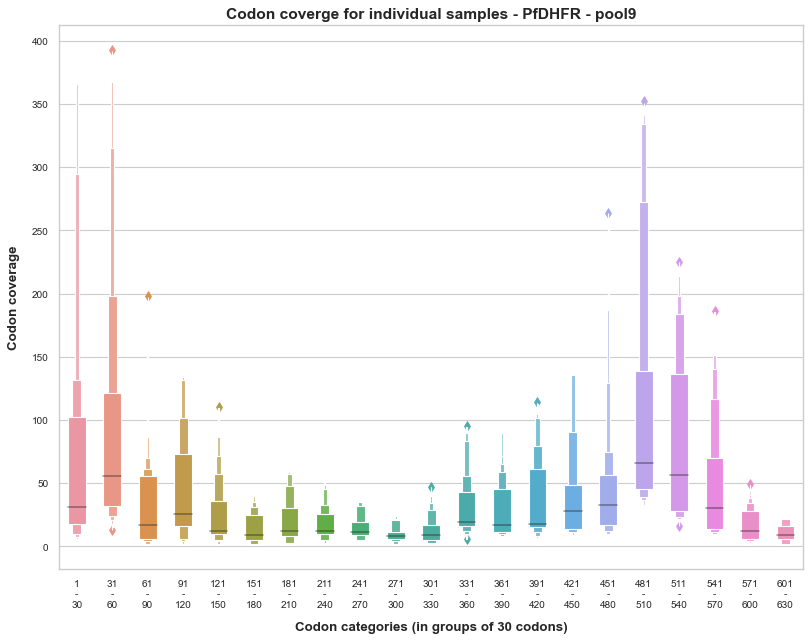

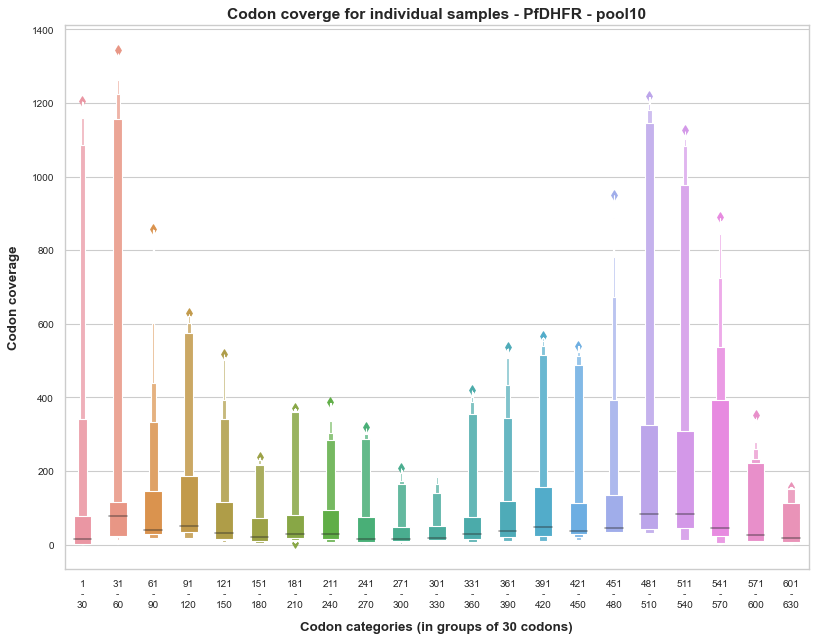

In [59]:
import os
import pandas as pd

"""
Combining the boxenplots for PfDHFR while keeping the 30 codon category.

Goal: Add each respective category positions for each gene to make a single category position.

dict{sample1: [[1-30], [31-60], [61,90]], sample2: [[1-30], [31-60], [61,90]], sample3: [[1-30], [31-60], [61,90]]}
==> this is cc_dict2

Adding sample1[1-30] + sample2[1-30]+ sample3[1-30] to get final[1-30]
==> fin is a list of lists --> fin = [[1-30 of all samples], [31-60 of all samples], [61-90 of all samples]]

Using fin for plotting the boxenplot.

Converting fin into a tuple for values to plot
"""

for i in range(1, 11):
    pool_id = "pool"+str(i)

    cc_dict2 = {}
    directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/'+pool_id
    for filename in os.listdir(directory):
    #     temp_list = []
        if filename != ".DS_Store":
            filepath = os.path.join(directory, filename)
            sample_num = filename[4:10]
            df = pd.read_csv(filepath, sep="\t") # reading each coverage file in pool 1 as a dataframe
            df_list = list(df.Codon_coverage) #converting coverage column into a list
            cc_dict2[sample_num] = []
            for i in range(0, len(df_list), 30):
                temp_list = df_list[i:i+30]
                cc_dict2[sample_num].append(temp_list)

    fin = []

    for key in cc_dict2:
        print(len(cc_dict2[key]), key)

    first_key_cc_dict2 = list(cc_dict2.keys())[0]
    # print(first_key_cc_dict2)

    for j in range(len(cc_dict2[first_key_cc_dict2])):
        temp = []
        for key in cc_dict2:
            if j < len(cc_dict2[key]):
                for i in range(len(cc_dict2[key][j])):
                    temp.append(cc_dict2[key][j][i])
        fin.append(temp)
    # print(fin)

    fin_tuple = tuple(fin)

    import seaborn as sns, matplotlib.pyplot as plt

    data_list = []
    final = []
    dict_data = {}
    keys_list=[]

    # label_file = 

    with open(r"/Users/mansi/Desktop/haiti-ind/PfDHFR/Category_results/avg_cat_cov/avg_9540Pf_PfDHFR_cat_cov.txt") as f1:
        for line in f1:
            new=line.split(",")
    #         print(new)
        for i in range(len(new)):
            if len(new[i]) != 0:
                final.append(int(new[i]))

    for i in range(0, len(final), 30):
            key = str(i+1)+ "\n-\n" +str(i + 30)
            keys_list.append(key)
    labels_tup = tuple(keys_list)

    dpi = 80   
    fig = plt.figure(1, figsize=(12, 9), dpi = dpi)
    ax = fig.add_subplot(111)    
    sns.set(rc={'figure.figsize':(12,10)}, style="whitegrid")
    bp = sns.boxenplot(data = fin_tuple, width = 0.5)

    title = 'Codon coverge for individual samples - PfDHFR - '+pool_id

    ax.set_title(title, fontweight ='bold', fontsize = 14)
    ax.set_ylabel('Codon coverage', fontweight ='bold', labelpad = 10.5)
    ax.set_xlabel('Codon categories (in groups of 30 codons)', fontweight ='bold', labelpad = 10.5)

    plt.xticks(plt.xticks()[0], labels = labels_tup)
    plt.tick_params('both', labelsize='9')


    plt.show()

    outputfile = '/Users/mansi/Desktop/haiti-ind/PfDHFR/Pool_Images/'+"PfDHFR-ind-"+pool_id+".png"
#     fig.savefig(outputfile, bbox_inches='tight')

## Adding CT values

In [1]:
## Adding CT Values

import pandas as pd
import os
import subprocess

excel_path = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Haiti_PetValues.xlsx'

df_pet = pd.read_excel(excel_path, sheet_name = "CovValidation")

ct_val = list(df_pet['SPECIES_CT'].round(decimals=1))
# print(ct_val)

ct_list = []
for i in range(0, len(ct_val), 10):
    min_ct = (min(ct_val[i:i+10]))
    max_ct = (max(ct_val[i:i+10]))
    ct_range = str(min_ct)+"-"+str(max_ct)
    print(ct_range)
    ct_list.append(ct_range)
    
# print(ct_list)
# print(len(ct_list))

## Running the plots again to add ct values

21.0-22.6
23.0-24.8
25.2-26.6
27.0-28.9
29.1-30.9
31.1-32.9
33.2-34.9
35.0-36.9
37.0-38.9
39.5-40.4


## Running the plots again to add ct values

21 9955Pf
21 9696Pf
21 9953Pf
21 9540Pf
21 10026P
21 9832Pf
21 9867Pf
21 10076P
21 9593Pf
21 9647Pf


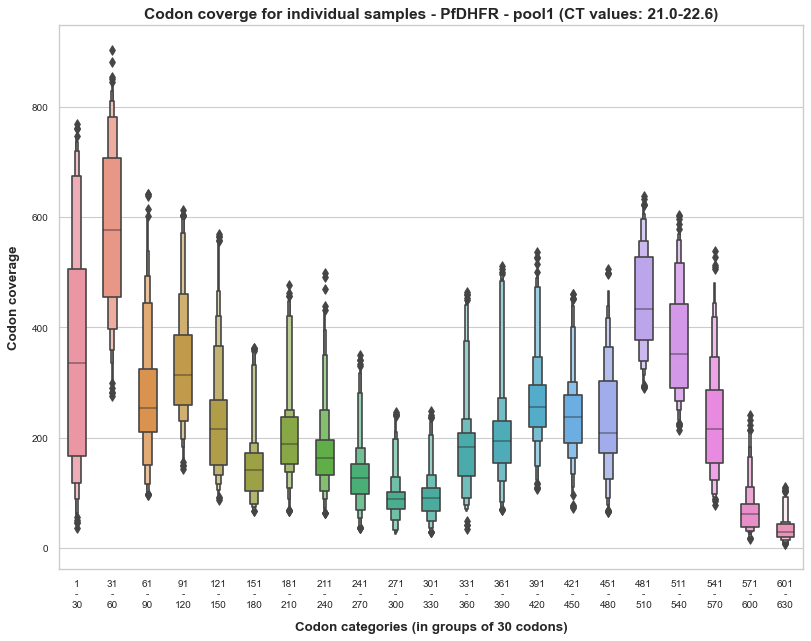

21 10118P
21 9918Pf
21 9750Pf
21 10018P
21 10007P
21 10044P
21 9816Pf
21 9934Pf
21 9654Pf
21 10022P


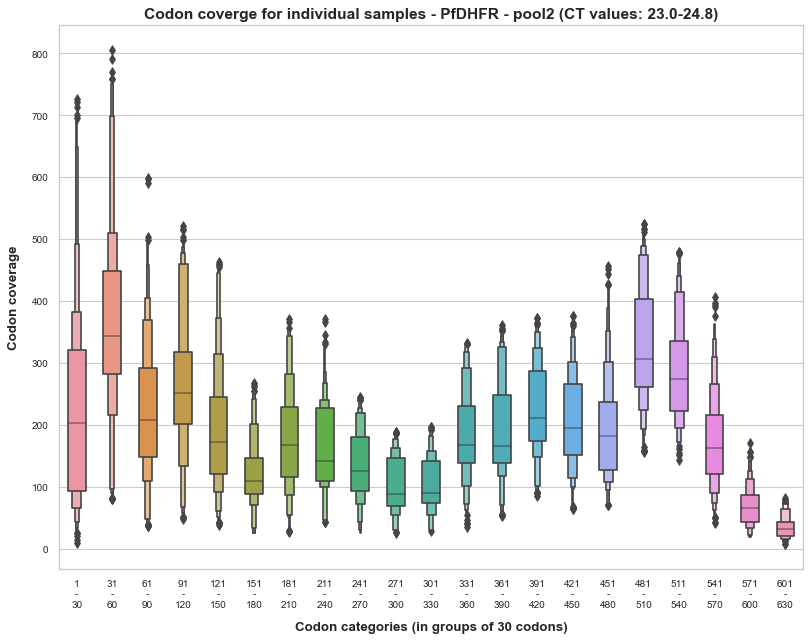

21 9546Pf
21 9873Pf
21 9743Pf
21 9556Pf
21 9706Pf
21 9791Pf
21 10079P
21 9572Pf
21 9930Pf


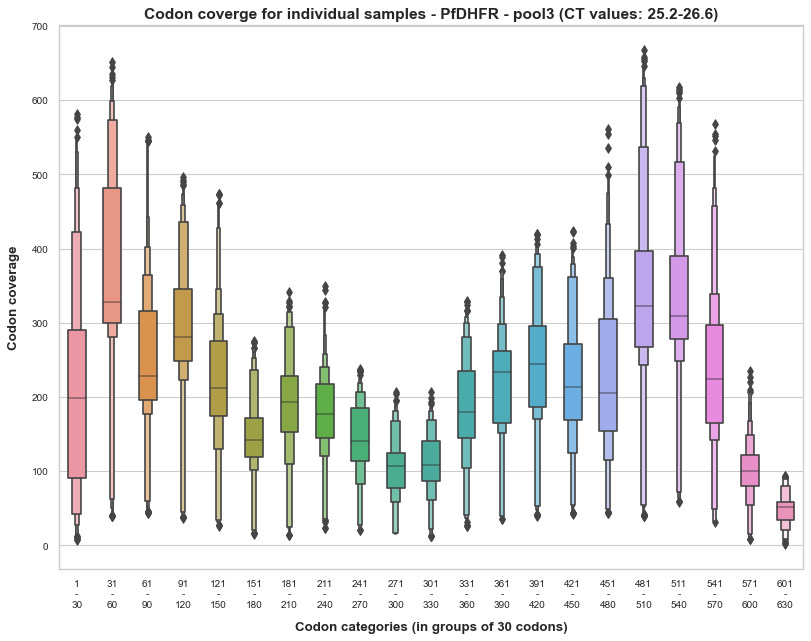

21 9637Pf
21 9869Pf
21 10000P
21 9748Pf
21 9916Pf
21 10163P
21 9984Pf
21 9646Pf
21 9808Pf
21 9799Pf


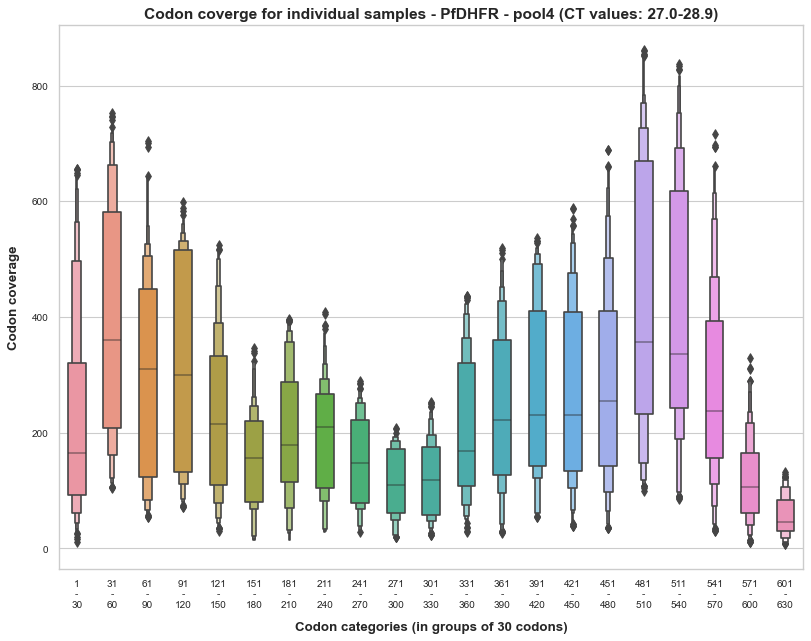

21 9838Pf
21 9667Pf
21 9545Pf
21 9919Pf
21 9625Pf
21 9943Pf
21 9805Pf
21 9844Pf
21 9785Pf
21 9780Pf


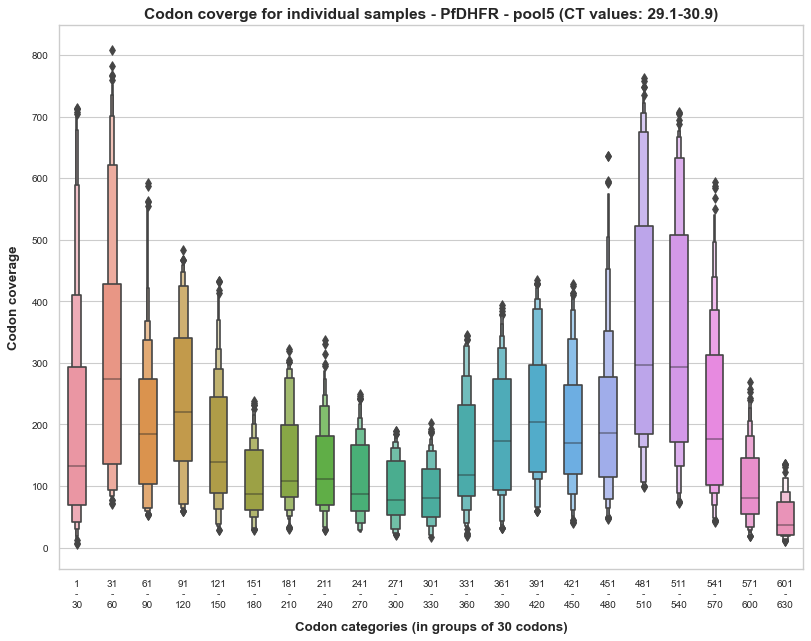

21 9950Pf
21 9866Pf
21 9579Pf
21 9975Pf
21 9924Pf
21 10102P
21 10104P
21 9978Pf
21 9994Pf
21 9859Pf


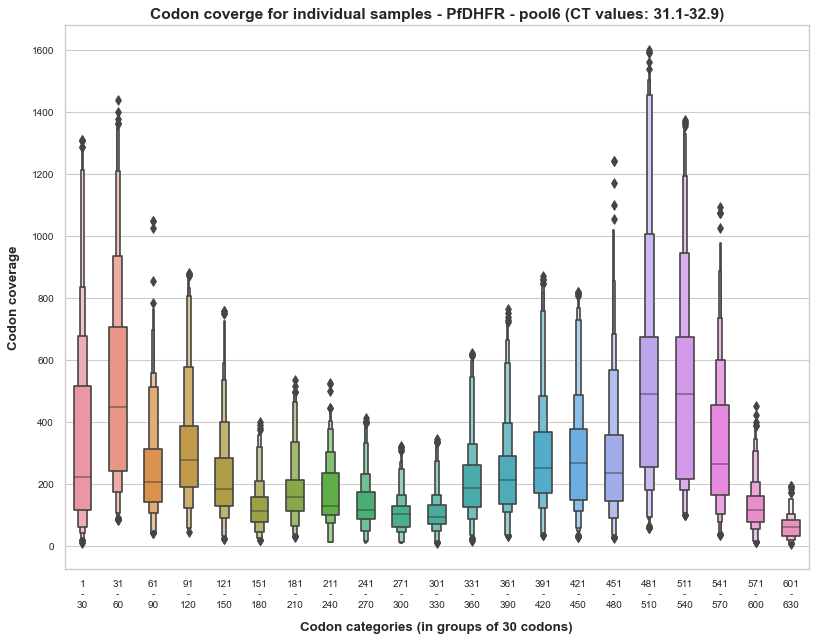

21 9903Pf
21 9754Pf
21 9610Pf
21 9794Pf
21 9973Pf
21 9819Pf
21 9599Pf
21 9575Pf
21 9656Pf
21 9769Pf


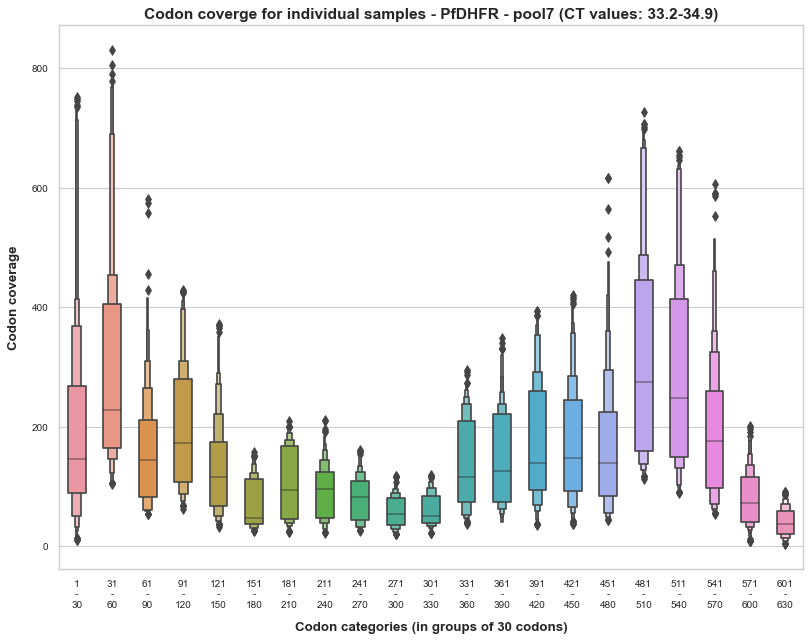

21 9884Pf
21 9944Pf
14 9672Pf
21 9897Pf
1 9683Pf
20 9621Pf
21 9855Pf
21 9788Pf
20 9596Pf


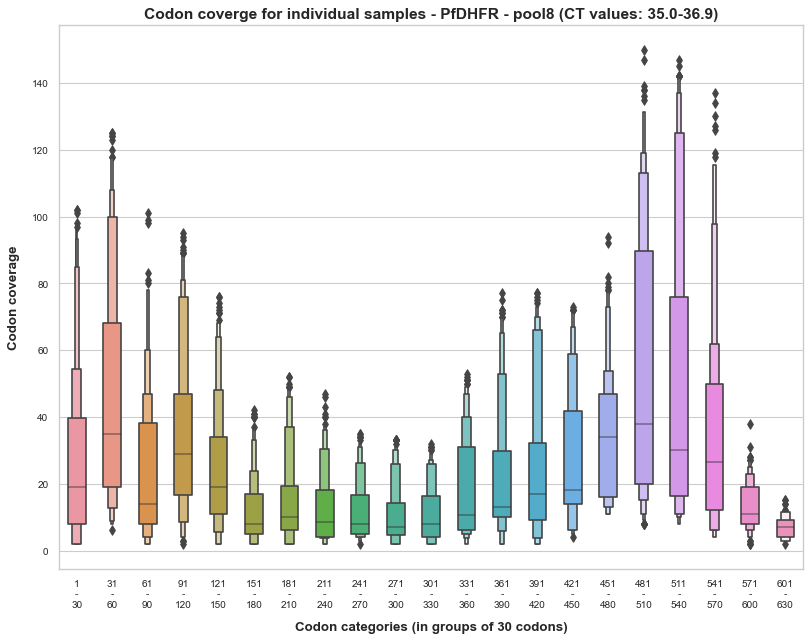

21 10158P
21 10040P
14 9913Pf
21 10100P
21 10121P
20 9560Pf
21 9817Pf


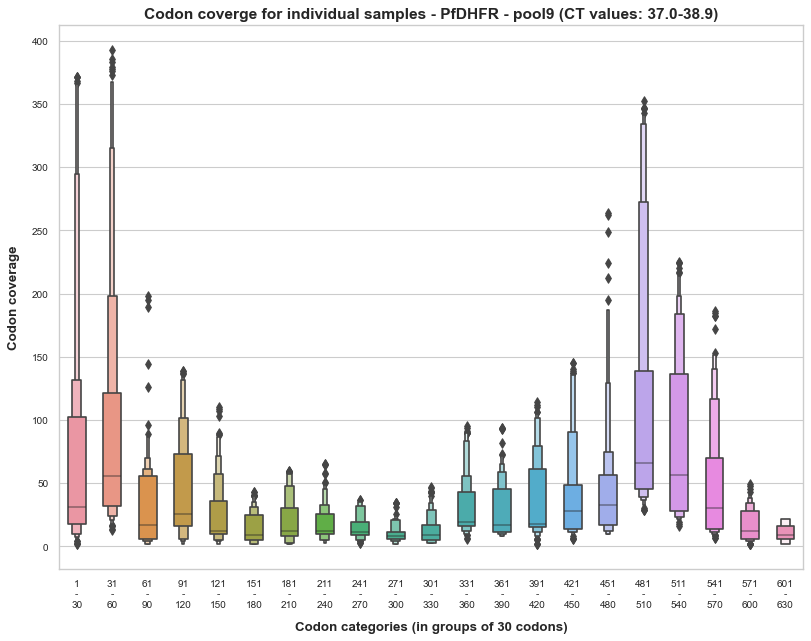

21 10133P
2 10039P
21 9999Pf
21 9569Pf
1 10147P
19 9810Pf


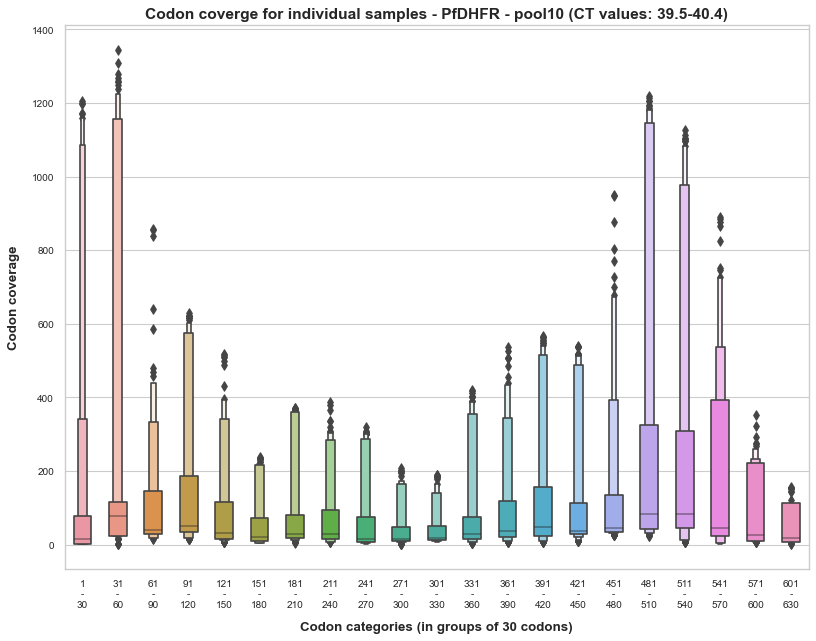

In [3]:
import os
import pandas as pd

"""
Combining the boxenplots for PfDHFR while keeping the 30 codon category.

Goal: Add each respective category positions for each gene to make a single category position.

dict{sample1: [[1-30], [31-60], [61,90]], sample2: [[1-30], [31-60], [61,90]], sample3: [[1-30], [31-60], [61,90]]}
==> this is cc_dict2

Adding sample1[1-30] + sample2[1-30]+ sample3[1-30] to get final[1-30]
==> fin is a list of lists --> fin = [[1-30 of all samples], [31-60 of all samples], [61-90 of all samples]]

Using fin for plotting the boxenplot.

Converting fin into a tuple for values to plot
"""

for i in range(1, 11):
    pool_id = "pool"+str(i)
    ct_value = ct_list[i-1]
    cc_dict2 = {}
    directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/'+pool_id
    for filename in os.listdir(directory):
    #     temp_list = []
        if filename != ".DS_Store":
            filepath = os.path.join(directory, filename)
            sample_num = filename[4:10]
            df = pd.read_csv(filepath, sep="\t") # reading each coverage file in pool 1 as a dataframe
            df_list = list(df.Codon_coverage) #converting coverage column into a list
            cc_dict2[sample_num] = []
            for i in range(0, len(df_list), 30):
                temp_list = df_list[i:i+30]
                cc_dict2[sample_num].append(temp_list)

    fin = []

    for key in cc_dict2:
        print(len(cc_dict2[key]), key)

    first_key_cc_dict2 = list(cc_dict2.keys())[0]
    # print(first_key_cc_dict2)

    for j in range(len(cc_dict2[first_key_cc_dict2])):
        temp = []
        for key in cc_dict2:
            if j < len(cc_dict2[key]):
                for i in range(len(cc_dict2[key][j])):
                    temp.append(cc_dict2[key][j][i])
        fin.append(temp)
    # print(fin)

    fin_tuple = tuple(fin)

    import seaborn as sns, matplotlib.pyplot as plt

    data_list = []
    final = []
    dict_data = {}
    keys_list=[]

    # label_file = 

    with open(r"/Users/mansi/Desktop/haiti-ind/PfDHFR/Category_results/avg_cat_cov/avg_9540Pf_PfDHFR_cat_cov.txt") as f1:
        for line in f1:
            new=line.split(",")
    #         print(new)
        for i in range(len(new)):
            if len(new[i]) != 0:
                final.append(int(new[i]))

    for i in range(0, len(final), 30):
            key = str(i+1)+ "\n-\n" +str(i + 30)
            keys_list.append(key)
    labels_tup = tuple(keys_list)

    dpi = 80   
    fig = plt.figure(1, figsize=(12, 9), dpi = dpi)
    ax = fig.add_subplot(111)    
    sns.set(rc={'figure.figsize':(12,10)}, style="whitegrid")
    bp = sns.boxenplot(data = fin_tuple, width = 0.5)

    title = 'Codon coverge for individual samples - PfDHFR - '+pool_id+ " (CT values: "+ct_value+")"

    ax.set_title(title, fontweight ='bold', fontsize = 14)
    ax.set_ylabel('Codon coverage', fontweight ='bold', labelpad = 10.5)
    ax.set_xlabel('Codon categories (in groups of 30 codons)', fontweight ='bold', labelpad = 10.5)

    plt.xticks(plt.xticks()[0], labels = labels_tup)
    plt.tick_params('both', labelsize='9')


    plt.show()

    outputfile = '/Users/mansi/Desktop/haiti-ind/PfDHFR/Pool_Images/'+"PfDHFR-ind-"+pool_id+".png"
    fig.savefig(outputfile, bbox_inches='tight')